In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile

In [3]:
 df=pd.read_excel(r"C:\Users\srile\Downloads\Global Superstore.xls")

In [4]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [8]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [9]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

Row ID             0.00000
Order ID           0.00000
Order Date         0.00000
Ship Date          0.00000
Ship Mode          0.00000
Customer ID        0.00000
Customer Name      0.00000
Segment            0.00000
City               0.00000
State              0.00000
Country            0.00000
Postal Code       80.51472
Market             0.00000
Region             0.00000
Product ID         0.00000
Category           0.00000
Sub-Category       0.00000
Product Name       0.00000
Sales              0.00000
Quantity           0.00000
Discount           0.00000
Profit             0.00000
Shipping Cost      0.00000
Order Priority     0.00000
dtype: float64

In [14]:
df.drop("Postal Code",axis=1,inplace=True)

In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [16]:
df_num=df.select_dtypes(include=[np.number])
df_num

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,2309.650,7,0.0,762.1845,933.570
1,26341,3709.395,9,0.1,-288.7650,923.630
2,25330,5175.171,9,0.1,919.9710,915.490
3,13524,2892.510,5,0.1,-96.5400,910.160
4,47221,2832.960,8,0.0,311.5200,903.040
...,...,...,...,...,...,...
51285,29002,65.100,5,0.0,4.5000,0.010
51286,35398,0.444,1,0.8,-1.1100,0.010
51287,40470,22.920,3,0.0,11.2308,0.010
51288,9596,13.440,2,0.0,2.4000,0.003


In [17]:
type(df_num)

pandas.core.frame.DataFrame

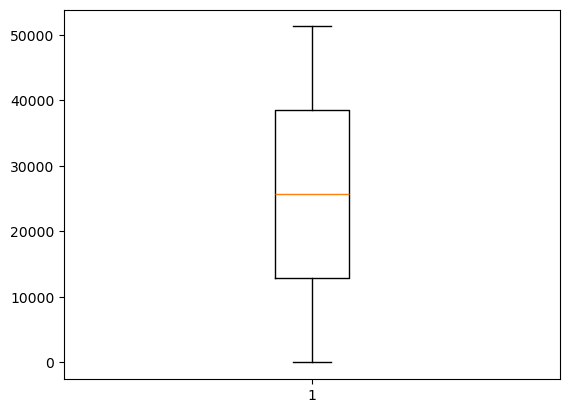

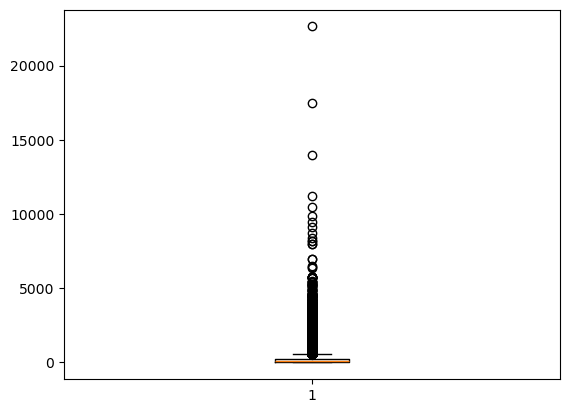

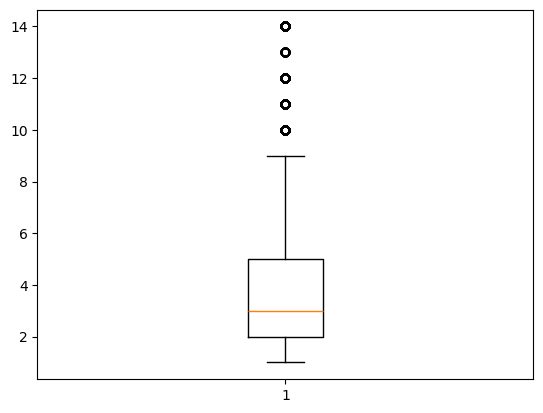

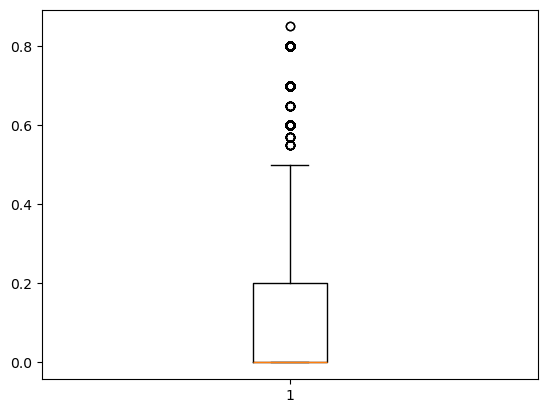

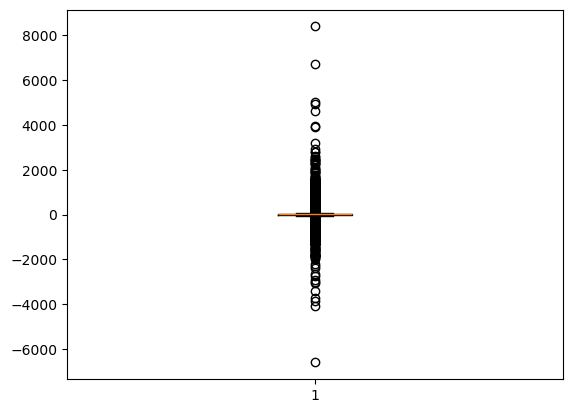

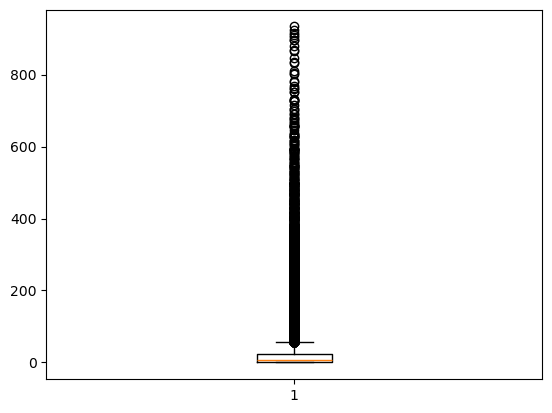

In [18]:
for i in df_num:
    plt.boxplot(x=i,data=df_num)
    plt.show()

In [20]:
df_num["Profit"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     -30.5712
0.25       0.0000
0.50       9.2400
0.75      36.8100
1.00    8399.9760
Name: Profit, dtype: float64

In [21]:
df_1=df_num[(df_num["Profit"]>=0.0)&(df_num["Profit"]<=36.8100)]

In [22]:
df_1.shape

(25928, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

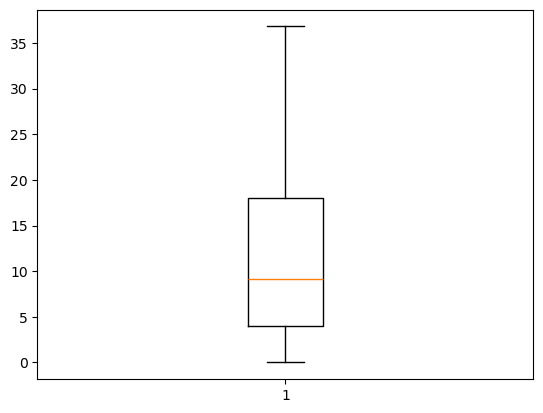

In [23]:
plt.boxplot(df_1["Profit"])
plt.show

In [24]:
df_1["Sales"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10      12.54
0.25      23.64
0.50      48.78
0.75      96.18
1.00    3616.50
Name: Sales, dtype: float64

In [25]:

df_2=df_1[(df_1["Sales"]>=23.64)&(df_1["Sales"]<=96.18)]

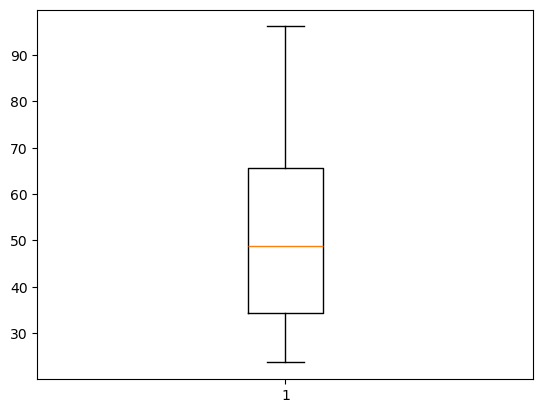

In [26]:
plt.boxplot(df_2["Sales"])
plt.show()

In [27]:
df_2["Quantity"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     1.0
0.25     2.0
0.50     3.0
0.75     4.0
1.00    14.0
Name: Quantity, dtype: float64

In [28]:

df_3=df_2[(df_2["Quantity"]>=2.0)&(df_2["Quantity"]<=4.0)]

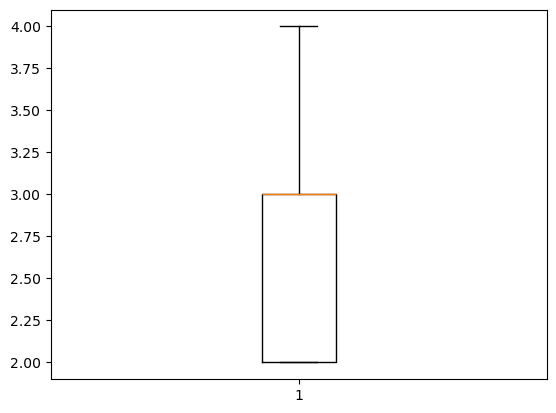

In [29]:
plt.boxplot(df_3["Quantity"])
plt.show()

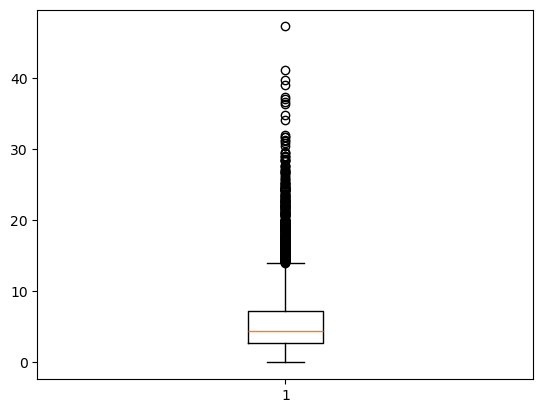

In [30]:
plt.boxplot(df_3["Shipping Cost"])
plt.show()

In [31]:

df_3["Shipping Cost"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     1.72000
0.25     2.70000
0.50     4.46100
0.75     7.23675
1.00    47.28000
Name: Shipping Cost, dtype: float64

In [32]:
df_4=df_3[(df_3["Shipping Cost"] >=2.70) & (df_3["Shipping Cost"] <=7.23675)]

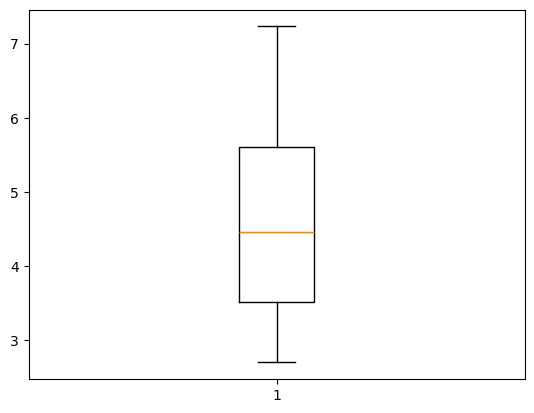

In [33]:
plt.boxplot(df_4["Shipping Cost"])
plt.show()

In [34]:
df_4.columns

Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [35]:

df_4.drop("Row ID",axis=1,inplace=True)

In [36]:

df_4.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
26583,33.420,2,0.0,1.320,7.23
26584,95.160,2,0.0,4.740,7.23
26586,47.880,3,0.0,9.090,7.23
26587,40.905,3,0.1,9.495,7.23
26594,75.960,2,0.0,22.788,7.23


In [37]:
df_4.shape

(3953, 5)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_4) # Pass the dataframe, not columns

In [40]:
df_scaled

array([[-0.9668337 , -0.97568495, -0.45078652, -1.31867603,  2.05922207],
       [ 2.34630826, -0.97568495, -0.45078652, -0.91751442,  2.05922207],
       [-0.19086945,  0.32031055, -0.45078652, -0.407265  ,  2.05922207],
       ...,
       [-1.11494306, -0.97568495, -0.45078652, -0.43189773, -1.51329158],
       [-1.44829645,  1.61630605,  1.70615728, -0.43396219, -1.51329158],
       [-0.84126273, -0.97568495, -0.45078652, -0.05184989, -1.51329158]])

In [41]:
final_df=pd.DataFrame(df_scaled,columns=df_4.columns)

In [42]:
final_df

,Sales,Quantity,Discount,Profit,Shipping Cost
0,-0.966834,-0.975685,-0.450787,-1.318676,2.059222
1,2.346308,-0.975685,-0.450787,-0.917514,2.059222
2,-0.190869,0.320311,-0.450787,-0.407265,2.059222
3,-0.565168,0.320311,0.627685,-0.359759,2.059222
4,1.315982,-0.975685,-0.450787,1.199493,2.059222
...,...,...,...,...,...
3948,-0.110375,-0.975685,-0.450787,-1.016045,-1.513292
3949,-0.192801,1.616306,0.627685,1.013692,-1.513292
3950,-1.114943,-0.975685,-0.450787,-0.431898,-1.513292
3951,-1.448296,1.616306,1.706157,-0.433962,-1.513292


In [43]:
final_df.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [44]:

x=final_df.drop("Profit",axis=1)
y=final_df["Profit"]

In [45]:
x

,Sales,Quantity,Discount,Shipping Cost
0,-0.966834,-0.975685,-0.450787,2.059222
1,2.346308,-0.975685,-0.450787,2.059222
2,-0.190869,0.320311,-0.450787,2.059222
3,-0.565168,0.320311,0.627685,2.059222
4,1.315982,-0.975685,-0.450787,2.059222
...,...,...,...,...
3948,-0.110375,-0.975685,-0.450787,-1.513292
3949,-0.192801,1.616306,0.627685,-1.513292
3950,-1.114943,-0.975685,-0.450787,-1.513292
3951,-1.448296,1.616306,1.706157,-1.513292


In [46]:
y

0      -1.318676
1      -0.917514
2      -0.407265
3      -0.359759
4       1.199493
          ...   
3948   -1.016045
3949    1.013692
3950   -0.431898
3951   -0.433962
3952   -0.051850
Name: Profit, Length: 3953, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

,Sales,Quantity,Discount,Shipping Cost
2015,-0.317514,1.616306,-0.450787,-0.156840
3577,-1.201877,-0.975685,-0.450787,-1.284588
3185,-0.499388,-0.975685,1.382616,-1.016452
111,1.934178,0.320311,-0.450787,1.862063
2320,-0.345418,1.616306,-0.450787,-0.385544
...,...,...,...,...
1130,0.684908,1.616306,-0.450787,0.655453
1294,-0.049200,-0.975685,-0.450787,0.489840
860,0.358208,-0.975685,1.706157,0.939361
3507,0.635001,0.320311,-0.450787,-1.245156


In [48]:
y_test

3389   -1.093462
2119   -0.042466
2507   -0.353636
70     -0.945666
2610   -0.424860
          ...   
565    -0.277063
313    -0.428379
601     0.553411
233    -1.168721
3370    1.767453
Name: Profit, Length: 1186, dtype: float64

In [49]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(9,input_dim=4,activation='relu'),
                                  tf.keras.layers.Dense(6,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='linear')])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
h1=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0000e+00 - loss: 1.0542
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.9055
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.8432
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.7844
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.7803


In [51]:
y_pred=model.predict(x_test)
y_pred

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[ 0.19207796],
       [ 0.28002357],
       [-0.15574074],
       ...,
       [ 0.1555776 ],
       [ 0.55248094],
       [ 0.7622062 ]], dtype=float32)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

-2.9527172868889204

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline 

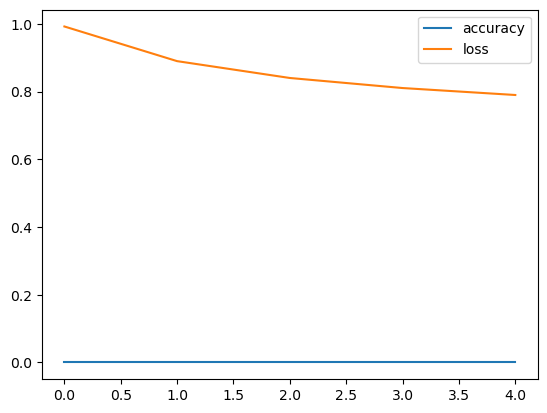

In [54]:
metrics_df = pd.DataFrame(h1.history)
metrics_df.plot()
plt.show()

In [55]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)

# Define hyperparameter grid for DecisionTreeRegressor
param_grid = {
    "max_depth": [3, 5, 10, None],  # Different depths to prevent overfitting
    "max_features": [5, 10, 15, 20],  # Testing different feature subsets
    "min_samples_leaf": [1, 5, 10],  # Prevent overfitting
    "criterion": ["squared_error", "friedman_mse", "absolute_error"]  # Regression criteria
}

# Initialize DecisionTreeRegressor & perform Grid Search
tree = DecisionTreeRegressor()
tree_cv = GridSearchCV(tree, param_grid, cv=5, scoring="r2", n_jobs=-1)  # Use R² score for regression
tree_cv.fit(X, y)

# Print best parameters and score
print("Best Parameters: {}".format(tree_cv.best_params_))
print("Best R² Score: {:.4f}".format(tree_cv.best_score_))

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 10}
Best R² Score: 0.5491


In [ ]:

import numpy as np
from sklearn.datasets import make_regression
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)

# Define hyperparameter distribution for DecisionTreeRegressor
param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 20),  # Increased range to match number of features
    "min_samples_leaf": randint(1, 9),
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"]  # Valid criteria for regression
}

# Initialize DecisionTreeRegressor & perform Randomized Search
tree = DecisionTreeRegressor()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, n_iter=10, random_state=42, scoring="r2")  # R² for regression
tree_cv.fit(X, y)

# Print best parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score (R²) is {}".format(tree_cv.best_score_))